In [1]:
import math
import numpy as np
import joblib
import os
import matplotlib.pyplot as plt
from collections import defaultdict


# Defining the function that predicts the speaker :

In [2]:
def get_scores(mfcc_features, gmm_models):
    scores = {}
    for model_name, gmm_model in gmm_models.items():
        scores[model_name.split(".")[0]] = gmm_model.score(mfcc_features)
    return scores


# Loading all the gmm models and storing them in dictionaries according to the  n_components and gender : 
## key: model_name , value: gmm model 

In [8]:
# Load all GMM models from the appropriate folder
model_folder = r'GMM\H'
gmm_models_H_16 = {}
gmm_models_H_32 = {}
gmm_models_H_128 = {}
gmm_models_H_256 = {}
for model_filename in os.listdir(model_folder):
    model_path = os.path.join(model_folder, model_filename)
    gmm_model = joblib.load(model_path)
    if model_filename.endswith(".16.gmm"):
        gmm_models_H_16[model_filename] = gmm_model
    elif model_filename.endswith(".32.gmm"):
        gmm_models_H_32[model_filename] = gmm_model
    elif model_filename.endswith(".128.gmm"):
        gmm_models_H_128[model_filename] = gmm_model
    elif model_filename.endswith(".256.gmm"):
        gmm_models_H_256[model_filename] = gmm_model

# Loading the files containing the mfcc features and storing them in dictionaries according to duration and gender:
## key: file_name , value: mfcc_features

In [9]:
# Set the path to the test folder
test_folder = r'MFCC\Test-segments'

# Initialize dictionaries to store the loaded test files
test_files_3_H = {}
test_files_3_F = {}
test_files_10_H = {}
test_files_10_F = {}
test_files_15_H = {}
test_files_15_F = {}
test_files_30_H = {}
test_files_30_F = {}

# Set the duration sub-folders
duration_folders = ["3", "10", "15", "30"]

for duration_folder in duration_folders:
    duration_folder_path = os.path.join(test_folder, duration_folder)

    # Check if the duration sub-folder exists
    if os.path.isdir(duration_folder_path):
        # Iterate over the gender sub-folders
        for gender_folder in os.listdir(duration_folder_path):
            gender_folder_path = os.path.join(duration_folder_path, gender_folder)

            # Check if the item in the duration sub-folder is a directory
            if os.path.isdir(gender_folder_path):
                # Determine the appropriate dictionary based on duration and gender
                if duration_folder == "3" and gender_folder == "H":
                    test_files_dict = test_files_3_H
                elif duration_folder == "3" and gender_folder == "F":
                    test_files_dict = test_files_3_F
                elif duration_folder == "10" and gender_folder == "H":
                    test_files_dict = test_files_10_H
                elif duration_folder == "10" and gender_folder == "F":
                    test_files_dict = test_files_10_F
                elif duration_folder == "15" and gender_folder == "H":
                    test_files_dict = test_files_15_H
                elif duration_folder == "15" and gender_folder == "F":
                    test_files_dict = test_files_15_F
                elif duration_folder == "30" and gender_folder == "H":
                    test_files_dict = test_files_30_H
                elif duration_folder == "30" and gender_folder == "F":
                    test_files_dict = test_files_30_F

                # Iterate over the test segments within the gender sub-folder
                for filename in os.listdir(gender_folder_path):
                    if filename.endswith(".mfcc"):
                        test_segment_path = os.path.join(gender_folder_path, filename)

                        # Load the MFCC features
                        mfcc_features = np.genfromtxt(test_segment_path, delimiter=',')

                        # Add the loaded features to the corresponding dictionary with the filename as the key
                        test_files_dict[filename] = mfcc_features


# Plotting the DET curve :


## a. GMM 16 :
### 3 second segments :


## Get the scores :

In [10]:
results_3_H_16 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_3_H.items():
    score = get_scores(test_segment, gmm_models_H_16)
    results_3_H_16.append((test_segment_name, score))

# Printing the results
for result in results_3_H_16:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")


File: H1.3.1.mfcc ,Score: {'H1': -51.52940474414831, 'H2': -57.3244456504897, 'H3': -56.949202616767764, 'H4': -58.041491962648436, 'H5': -56.5650520059886, 'H6': -56.990691211217744}
File: H1.3.2.mfcc ,Score: {'H1': -52.465690318385434, 'H2': -58.004266161038245, 'H3': -59.47993670891943, 'H4': -59.80404143825708, 'H5': -55.81324000108756, 'H6': -57.84271070499451}
File: H2.3.1.mfcc ,Score: {'H1': -74.01012746546817, 'H2': -45.912425888508494, 'H3': -55.87318711011042, 'H4': -53.04837496409297, 'H5': -53.07477707288116, 'H6': -61.48717247619522}
File: H2.3.10.mfcc ,Score: {'H1': -78.05116171045985, 'H2': -49.85159587397941, 'H3': -57.73492786498356, 'H4': -60.03891585484403, 'H5': -57.81095374068866, 'H6': -58.95795318620588}
File: H2.3.11.mfcc ,Score: {'H1': -83.2550632190541, 'H2': -48.5519808154403, 'H3': -56.94701393572774, 'H4': -57.230469576641745, 'H5': -56.23766462968112, 'H6': -60.85656960844847}
File: H2.3.12.mfcc ,Score: {'H1': -76.40611745316184, 'H2': -47.177554909925384,

## Sort the scores :

In [11]:
scores = [score for _, score in results_3_H_16]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)

# Plot DET curve :

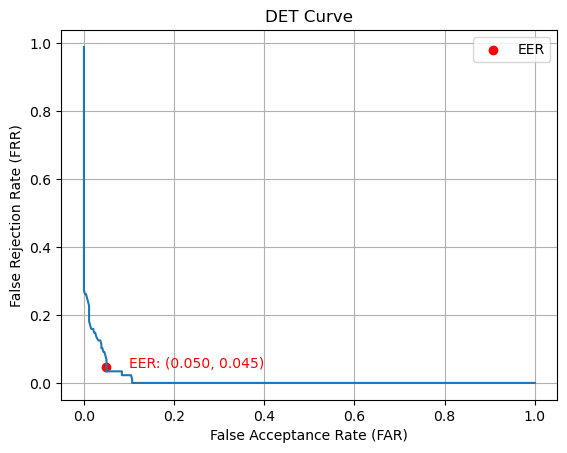

In [12]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_3_H_16:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


## 10 seconds segments :

### Get the scores 

In [13]:
results_10_H_16 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_10_H.items():
    score = get_scores(test_segment, gmm_models_H_16)
    results_10_H_16.append((test_segment_name, score))

# Printing the results
for result in results_10_H_16:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")




File: H1.10.1.mfcc ,Score: {'H1': -51.900527999932436, 'H2': -57.59391172811156, 'H3': -57.95233061707738, 'H4': -58.74012827390578, 'H5': -56.267050064408096, 'H6': -57.32841322384152}
File: H2.10.1.mfcc ,Score: {'H1': -75.87386716220854, 'H2': -47.59165502416482, 'H3': -55.95851316400235, 'H4': -56.19078680707136, 'H5': -55.29452533875476, 'H6': -61.126645204443875}
File: H2.10.2.mfcc ,Score: {'H1': -80.44629218478204, 'H2': -47.711462224363785, 'H3': -56.46735161694866, 'H4': -58.02790403077384, 'H5': -56.475265275142455, 'H6': -60.212038002492314}
File: H2.10.3.mfcc ,Score: {'H1': -79.73907244731421, 'H2': -48.11449074429754, 'H3': -56.58834652354833, 'H4': -57.718584157811186, 'H5': -55.68360075068094, 'H6': -59.21107392629794}
File: H2.10.4.mfcc ,Score: {'H1': -79.43112249466422, 'H2': -48.18464130807604, 'H3': -56.43725962250482, 'H4': -56.874585984547394, 'H5': -55.047036580057785, 'H6': -59.478950190262644}
File: H2.10.5.mfcc ,Score: {'H1': -80.4189195851549, 'H2': -47.0147960

## Sort the scores :

In [14]:
scores = [score for _, score in results_10_H_16]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)

## Plot DET curve

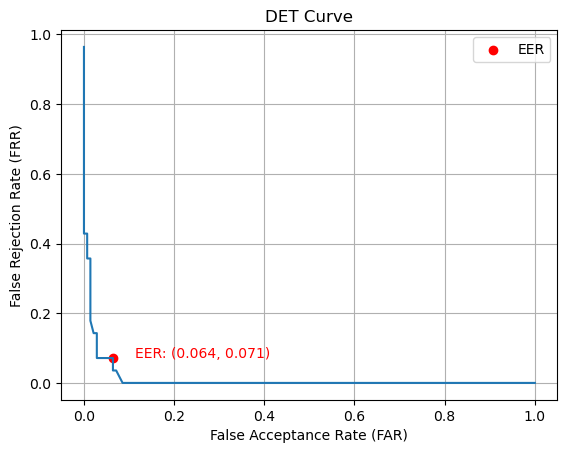

In [15]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_10_H_16:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


### 15 seconds segments :

## Get the scores

In [16]:
results_15_H_16 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_15_H.items():
    score = get_scores(test_segment, gmm_models_H_16)
    results_15_H_16.append((test_segment_name, score))

# Printing the results
for result in results_15_H_16:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: H1.15.1.mfcc ,Score: {'H1': -51.900527999932436, 'H2': -57.59391172811156, 'H3': -57.95233061707738, 'H4': -58.74012827390578, 'H5': -56.267050064408096, 'H6': -57.32841322384152}
File: H2.15.1.mfcc ,Score: {'H1': -77.6637632494968, 'H2': -47.33556353085874, 'H3': -56.253962619876276, 'H4': -56.75670505470394, 'H5': -55.84190511840601, 'H6': -61.29171572652303}
File: H2.15.2.mfcc ,Score: {'H1': -79.70905794670641, 'H2': -48.276175131025354, 'H3': -56.42217824978994, 'H4': -57.86814494240032, 'H5': -55.79368912464607, 'H6': -59.0747890289664}
File: H2.15.3.mfcc ,Score: {'H1': -79.04672449325967, 'H2': -47.391192824267954, 'H3': -56.38901940417635, 'H4': -56.002186387330916, 'H5': -54.51291452214779, 'H6': -60.233332695611054}
File: H2.15.4.mfcc ,Score: {'H1': -81.29568205089839, 'H2': -46.93766747593192, 'H3': -57.77128572777139, 'H4': -56.306352143305155, 'H5': -54.14003366840179, 'H6': -60.85905124392224}
File: H3.15.1.mfcc ,Score: {'H1': -92.26822478771517, 'H2': -55.9112517412

## Sort the scores 

In [17]:
# Extract the scores from results_15_H_16
scores = [score for _, score in results_15_H_16]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


## Plot the Det curve 

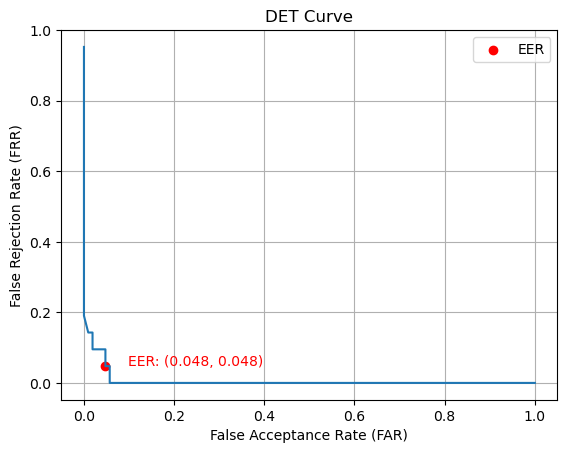

In [18]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_15_H_16:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


### 30 seconds segments :

## Get the scores

In [19]:
results_30_H_16 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_30_H.items():
    score = get_scores(test_segment, gmm_models_H_16)
    results_30_H_16.append((test_segment_name, score))

# Printing the results
for result in results_30_H_16:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: H1.30.1.mfcc ,Score: {'H1': -51.900527999932436, 'H2': -57.59391172811156, 'H3': -57.95233061707738, 'H4': -58.74012827390578, 'H5': -56.267050064408096, 'H6': -57.32841322384152}
File: H2.30.1.mfcc ,Score: {'H1': -78.6864105981016, 'H2': -47.80586933094205, 'H3': -56.338070434833114, 'H4': -57.31242499855213, 'H5': -55.817797121526056, 'H6': -60.183252377744715}
File: H2.30.2.mfcc ,Score: {'H1': -79.70443849596532, 'H2': -47.258558052584775, 'H3': -56.79326710258622, 'H4': -56.09114052351206, 'H5': -54.40386446114659, 'H6': -60.41632585596621}
File: H3.30.1.mfcc ,Score: {'H1': -92.18558824819026, 'H2': -55.890738641376124, 'H3': -49.39572503243479, 'H4': -58.39049232646869, 'H5': -60.89159550419674, 'H6': -58.369145093329124}
File: H3.30.2.mfcc ,Score: {'H1': -87.15875984549665, 'H2': -56.06775510942501, 'H3': -49.53297370740322, 'H4': -57.568006037848235, 'H5': -60.224431803798886, 'H6': -57.91359744304209}
File: H4.30.1.mfcc ,Score: {'H1': -82.08264639197532, 'H2': -57.1932780

## Sort the scores 

In [20]:
# Extract the scores from results_30_H_16
scores = [score for _, score in results_30_H_16]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


## Plot the Det curve

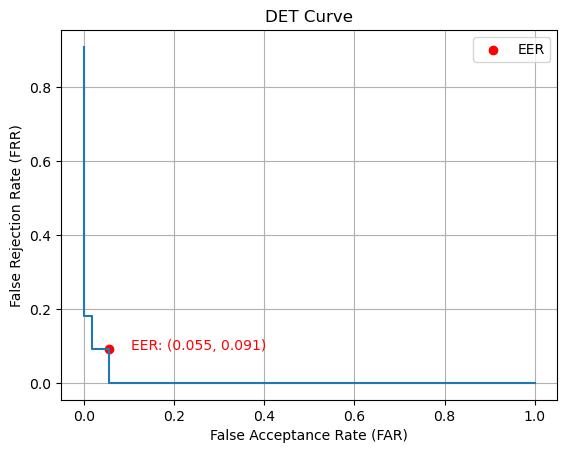

In [21]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_30_H_16:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


## b. GMM 32:
### 3 seconds segments :

## Get scores

In [22]:
results_3_H_32 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_3_H.items():
    score = get_scores(test_segment, gmm_models_H_32)
    results_3_H_32.append((test_segment_name, score))

# Printing the results
for result in results_3_H_32:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: H1.3.1.mfcc ,Score: {'H1': -57.056195515478834, 'H2': -59.802886986992746, 'H3': -60.698516277853315, 'H4': -60.84919758056278, 'H5': -58.44762968283358, 'H6': -58.29354519753227}
File: H1.3.2.mfcc ,Score: {'H1': -62.31266367256537, 'H2': -59.811936329793355, 'H3': -63.49640100107854, 'H4': -61.16774751689935, 'H5': -57.86210074172724, 'H6': -59.75235713259932}
File: H2.3.1.mfcc ,Score: {'H1': -90.73883307154529, 'H2': -46.21093257789106, 'H3': -56.21241865604621, 'H4': -55.437241371079736, 'H5': -54.538018553472625, 'H6': -63.89382966581019}
File: H2.3.10.mfcc ,Score: {'H1': -103.86040026951808, 'H2': -50.90901212256735, 'H3': -59.32901330563635, 'H4': -60.87886569666296, 'H5': -58.665830146028284, 'H6': -60.1440923523879}
File: H2.3.11.mfcc ,Score: {'H1': -104.77691862607071, 'H2': -49.508647148184416, 'H3': -58.74096954648782, 'H4': -59.56289530163259, 'H5': -57.79661077230828, 'H6': -62.54002033225879}
File: H2.3.12.mfcc ,Score: {'H1': -94.80881401200695, 'H2': -47.6050173608

## Sort the scores

In [23]:
# Extract the scores from results_3_H_32
scores = [score for _, score in results_3_H_32]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


## Plot the Det curve

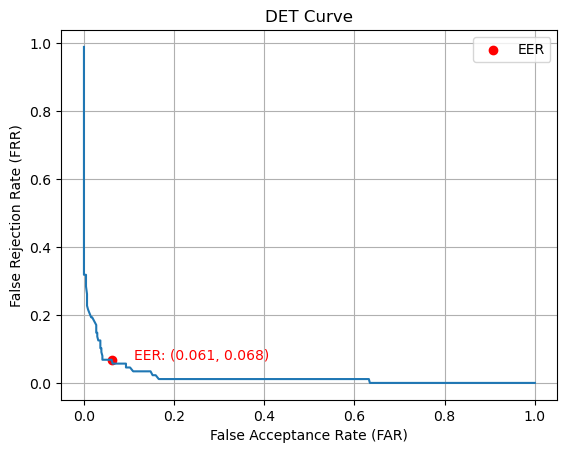

In [24]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_3_H_32:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


### 10 seconds segments :

## Get scores

In [25]:
results_10_H_32 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_10_H.items():
    score = get_scores(test_segment, gmm_models_H_32)
    results_10_H_32.append((test_segment_name, score))

# Printing the results
for result in results_10_H_32:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: H1.10.1.mfcc ,Score: {'H1': -59.13974526788537, 'H2': -59.806473949833226, 'H3': -61.807536983035156, 'H4': -60.9754638531147, 'H5': -58.215538734346765, 'H6': -58.8717865480518}
File: H2.10.1.mfcc ,Score: {'H1': -99.42820990855665, 'H2': -48.29854560229488, 'H3': -56.97495790803386, 'H4': -57.91053228202016, 'H5': -56.85306335037227, 'H6': -63.039924435667146}
File: H2.10.2.mfcc ,Score: {'H1': -104.66926724130617, 'H2': -48.19618160349569, 'H3': -57.929364107523824, 'H4': -60.07994201638882, 'H5': -57.43107059617912, 'H6': -61.6745631181205}
File: H2.10.3.mfcc ,Score: {'H1': -102.11017792935873, 'H2': -48.7666406533036, 'H3': -58.56199055638487, 'H4': -59.386126555566136, 'H5': -56.832563175005475, 'H6': -60.85931617250005}
File: H2.10.4.mfcc ,Score: {'H1': -100.862025319697, 'H2': -48.81448717162482, 'H3': -58.626310825502806, 'H4': -58.66800561834783, 'H5': -56.17801153138816, 'H6': -61.24488260433401}
File: H2.10.5.mfcc ,Score: {'H1': -97.236555365682, 'H2': -47.3316007599300

## Sort the scores 

In [26]:
# Extract the scores from results_3_H_32
scores = [score for _, score in results_10_H_32]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


## Plot the Det curve 

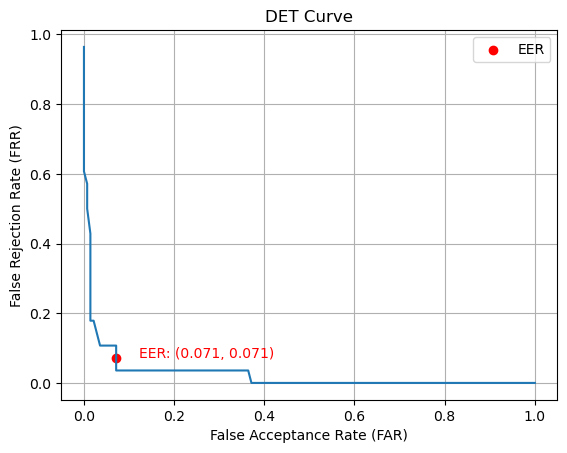

In [27]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_10_H_32:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


### 15 seconds segments :

## Get the scores 

In [28]:
results_15_H_32 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_15_H.items():
    score = get_scores(test_segment, gmm_models_H_32)
    results_15_H_32.append((test_segment_name, score))

# Printing the results
for result in results_15_H_32:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: H1.15.1.mfcc ,Score: {'H1': -59.13974526788537, 'H2': -59.806473949833226, 'H3': -61.807536983035156, 'H4': -60.9754638531147, 'H5': -58.215538734346765, 'H6': -58.8717865480518}
File: H2.15.1.mfcc ,Score: {'H1': -101.85296088337161, 'H2': -47.93681691252558, 'H3': -57.35556812238707, 'H4': -58.63323839781961, 'H5': -57.098968925536184, 'H6': -63.29602024485355}
File: H2.15.2.mfcc ,Score: {'H1': -102.28547583610944, 'H2': -48.90409499353719, 'H3': -58.28864025890797, 'H4': -59.6178288381638, 'H5': -56.97882915550173, 'H6': -60.419848906004916}
File: H2.15.3.mfcc ,Score: {'H1': -99.23991090874017, 'H2': -48.02534638908993, 'H3': -58.158656846088384, 'H4': -57.721885031411794, 'H5': -55.56301072656691, 'H6': -62.33394603226085}
File: H2.15.4.mfcc ,Score: {'H1': -99.04045944023046, 'H2': -47.05231430184832, 'H3': -59.19873646674423, 'H4': -57.83963837209334, 'H5': -55.80560978582554, 'H6': -62.72460280839893}
File: H3.15.1.mfcc ,Score: {'H1': -124.13699987665001, 'H2': -56.928991047

## Sort the scores 

In [29]:
# Extract the scores from results_15_H_32
scores = [score for _, score in results_15_H_32]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)

# Print the sorted array
print(sorted_scores_array)

[-145.50302403 -124.13699988 -122.64350456 -112.66225657 -107.29844102
 -106.2387018  -102.28547584 -102.23117544 -101.85296088 -101.83508174
  -99.99152137  -99.58276231  -99.23991091  -99.04045944  -98.02147016
  -96.58499992  -96.24761661  -94.90964093  -94.35010116  -92.91608138
  -68.78250672  -65.86769969  -65.58565935  -65.29311806  -64.23594677
  -64.02206544  -63.90447277  -63.72130182  -63.68381843  -63.29602024
  -63.20998019  -62.95751315  -62.92104     -62.72460281  -62.57239701
  -62.37180982  -62.33394603  -62.19237261  -62.06241642  -61.96227569
  -61.86635969  -61.84523123  -61.80753698  -61.60625986  -61.47725528
  -61.41198201  -61.37825108  -61.22795906  -60.97546385  -60.96318908
  -60.90095092  -60.77081198  -60.61554833  -60.52207515  -60.41984891
  -60.41581839  -60.18630536  -59.83392686  -59.80647395  -59.79939688
  -59.63687646  -59.61860543  -59.61782884  -59.34695638  -59.19873647
  -59.13974527  -59.12585168  -59.07521631  -59.01480485  -59.00937817
  -58.

## Plot the Det curve

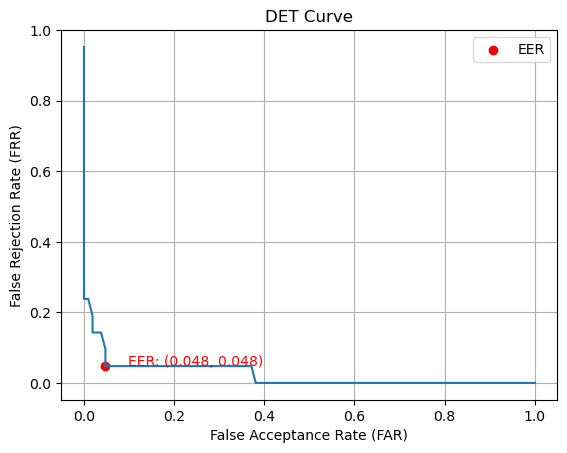

In [30]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_15_H_32:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


### 30 seconds segments :

## Get the scores 

In [31]:
results_30_H_32 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_30_H.items():
    score = get_scores(test_segment, gmm_models_H_32)
    results_30_H_32.append((test_segment_name, score))

# Printing the results
for result in results_30_H_32:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: H1.30.1.mfcc ,Score: {'H1': -59.13974526788537, 'H2': -59.806473949833226, 'H3': -61.807536983035156, 'H4': -60.9754638531147, 'H5': -58.215538734346765, 'H6': -58.8717865480518}
File: H2.30.1.mfcc ,Score: {'H1': -102.06921835974053, 'H2': -48.42045595303139, 'H3': -57.82210419064752, 'H4': -59.1255336179917, 'H5': -57.03889904051895, 'H6': -61.85793457542925}
File: H2.30.2.mfcc ,Score: {'H1': -99.18158076228922, 'H2': -47.74078040131173, 'H3': -58.46283107477076, 'H4': -57.75632232915828, 'H5': -55.63395950804821, 'H6': -62.448194712074816}
File: H3.30.1.mfcc ,Score: {'H1': -123.39025221957515, 'H2': -57.234006470748746, 'H3': -50.63969166511546, 'H4': -61.18933898638197, 'H5': -63.61602281261532, 'H6': -58.80653330357239}
File: H3.30.2.mfcc ,Score: {'H1': -117.1757375465805, 'H2': -57.7237364455213, 'H3': -50.64896352268943, 'H4': -59.64819819488433, 'H5': -62.9859940967698, 'H6': -58.894895366748216}
File: H4.30.1.mfcc ,Score: {'H1': -101.11134840545031, 'H2': -58.697012055273

## Sort the scores

In [32]:
# Extract the scores from results_30_H_32
scores = [score for _, score in results_30_H_32]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


## Plot the Det curve 

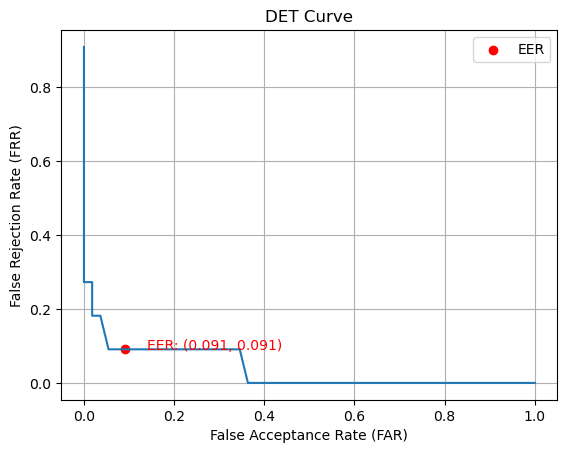

In [33]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_30_H_32:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


## c. GMM 128:
### 3 seconds segments :

## Get the scores

In [34]:
results_3_H_128 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_3_H.items():
    score = get_scores(test_segment, gmm_models_H_128)
    results_3_H_128.append((test_segment_name, score))

# Printing the results
for result in results_3_H_128:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: H1.3.1.mfcc ,Score: {'H1': -378.1810395798632, 'H2': -68.29789875424703, 'H3': -74.64991684243915, 'H4': -71.37475954805653, 'H5': -67.12437475476736, 'H6': -65.18358486637837}
File: H1.3.2.mfcc ,Score: {'H1': -386.18102234004044, 'H2': -69.47036968139227, 'H3': -81.58079109408746, 'H4': -75.44567833232131, 'H5': -65.95428266009172, 'H6': -64.80291456605453}
File: H2.3.1.mfcc ,Score: {'H1': -409.1050396808534, 'H2': -49.61134683916424, 'H3': -83.43560629662639, 'H4': -68.30976137687288, 'H5': -61.097964159149825, 'H6': -71.14394838798104}
File: H2.3.10.mfcc ,Score: {'H1': -614.8896712016939, 'H2': -56.653503817953414, 'H3': -74.96431877835707, 'H4': -75.61201037090771, 'H5': -69.01881601213928, 'H6': -66.75487664251767}
File: H2.3.11.mfcc ,Score: {'H1': -499.2907200046035, 'H2': -55.89161801724559, 'H3': -80.08743368843983, 'H4': -73.03193419813604, 'H5': -67.0255410711301, 'H6': -69.11037120701943}
File: H2.3.12.mfcc ,Score: {'H1': -415.54656355931365, 'H2': -51.72349695158573, 

## Sort the scores

In [35]:
# Extract the scores from results_3_H_128
scores = [score for _, score in results_3_H_128]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


## Plot the DET curve 

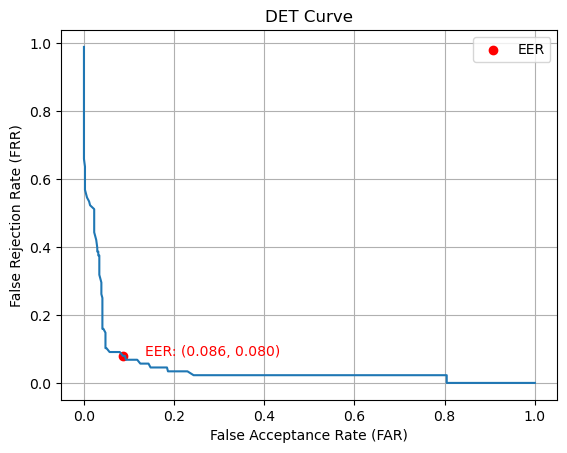

In [36]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_3_H_128:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


### 10 seconds segments :

## Get the scores

In [37]:
results_10_H_128 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_10_H.items():
    score = get_scores(test_segment, gmm_models_H_128)
    results_10_H_128.append((test_segment_name, score))

# Printing the results
for result in results_10_H_128:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: H1.10.1.mfcc ,Score: {'H1': -381.3520589033137, 'H2': -68.76264075152594, 'H3': -77.39716478524541, 'H4': -72.98838329151761, 'H5': -66.66057567498648, 'H6': -65.03269543144114}
File: H2.10.1.mfcc ,Score: {'H1': -484.65890277712845, 'H2': -53.54672186232101, 'H3': -80.06127120084058, 'H4': -70.58997492409183, 'H5': -65.35948931423219, 'H6': -70.1712043444606}
File: H2.10.2.mfcc ,Score: {'H1': -499.42414714172526, 'H2': -53.659721223753586, 'H3': -75.74789398292906, 'H4': -73.80593347815554, 'H5': -66.74918377550489, 'H6': -68.94146725408724}
File: H2.10.3.mfcc ,Score: {'H1': -513.0794736540003, 'H2': -53.51251880052258, 'H3': -76.02889499747738, 'H4': -74.16861540553076, 'H5': -65.44468150390276, 'H6': -67.2832844706584}
File: H2.10.4.mfcc ,Score: {'H1': -467.0998867738135, 'H2': -53.85147617352285, 'H3': -77.59744352941044, 'H4': -72.2554443408958, 'H5': -64.38633754433735, 'H6': -67.56386557500025}
File: H2.10.5.mfcc ,Score: {'H1': -438.965130900132, 'H2': -52.217736810503105, 

## Sort the scores 

In [38]:
# Extract the scores from results_10_H_128
scores = [score for _, score in results_10_H_128]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


## Plot the curve 

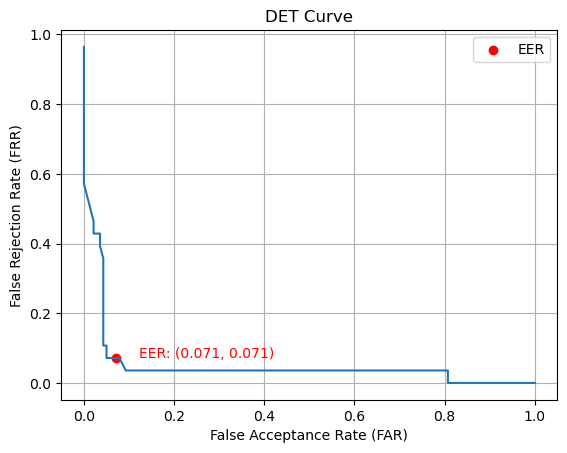

In [39]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_10_H_128:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


### 15 seconds segments :

## Get the scores

In [40]:
results_15_H_128 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_15_H.items():
    score = get_scores(test_segment, gmm_models_H_128)
    results_15_H_128.append((test_segment_name, score))

# Printing the results
for result in results_15_H_128:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: H1.15.1.mfcc ,Score: {'H1': -381.3520589033137, 'H2': -68.76264075152594, 'H3': -77.39716478524541, 'H4': -72.98838329151761, 'H5': -66.66057567498648, 'H6': -65.03269543144114}
File: H2.15.1.mfcc ,Score: {'H1': -490.18000876952635, 'H2': -53.40322688425815, 'H3': -80.34428089347699, 'H4': -71.9707393747497, 'H5': -65.95261308853149, 'H6': -70.77218245404637}
File: H2.15.2.mfcc ,Score: {'H1': -507.92834027904274, 'H2': -53.74274770680662, 'H3': -74.21442589402102, 'H4': -73.73894316376906, 'H5': -65.74962330722838, 'H6': -66.82512159209115}
File: H2.15.3.mfcc ,Score: {'H1': -454.01480444135444, 'H2': -52.96858550095559, 'H3': -80.3442930894127, 'H4': -70.98557709137, 'H5': -63.466561998966256, 'H6': -69.25320081418052}
File: H2.15.4.mfcc ,Score: {'H1': -456.26461268861107, 'H2': -51.7852814821679, 'H3': -82.12310807281374, 'H4': -72.87945801048689, 'H5': -63.73494197984753, 'H6': -70.10308825277774}
File: H3.15.1.mfcc ,Score: {'H1': -540.1888051856888, 'H2': -67.97704098682512, '

## Sort the scores

In [41]:
# Extract the scores from results_15_H_128
scores = [score for _, score in results_15_H_128]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


##  Plot the DET curve 

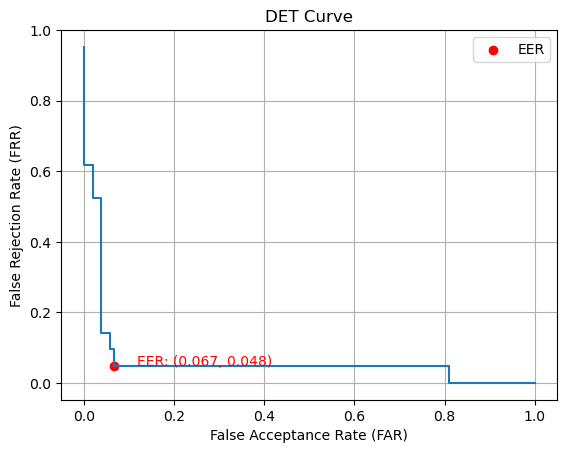

In [42]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_15_H_128:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


### 30 seconds segments :

## Get the scores

In [43]:
results_30_H_128 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_30_H.items():
    score = get_scores(test_segment, gmm_models_H_128)
    results_30_H_128.append((test_segment_name, score))

# Printing the results
for result in results_30_H_128:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: H1.30.1.mfcc ,Score: {'H1': -381.3520589033137, 'H2': -68.76264075152594, 'H3': -77.39716478524541, 'H4': -72.98838329151761, 'H5': -66.66057567498648, 'H6': -65.03269543144114}
File: H2.30.1.mfcc ,Score: {'H1': -499.0541745242846, 'H2': -53.57298729553239, 'H3': -77.279353393749, 'H4': -72.85484126925938, 'H5': -65.85111819787993, 'H6': -68.79865202306875}
File: H2.30.2.mfcc ,Score: {'H1': -454.6727672306465, 'H2': -52.62252489168749, 'H3': -80.86451256569035, 'H4': -71.53944792620608, 'H5': -63.54505048394096, 'H6': -69.50175280094008}
File: H3.30.1.mfcc ,Score: {'H1': -540.2428607561151, 'H2': -68.24718070365837, 'H3': -58.473011896074574, 'H4': -73.27199866347942, 'H5': -78.11072829451277, 'H6': -65.49125414438932}
File: H3.30.2.mfcc ,Score: {'H1': -520.3778124479671, 'H2': -68.09887319639068, 'H3': -58.487259487333496, 'H4': -71.29182817417211, 'H5': -78.05190993266666, 'H6': -64.98326226703438}
File: H4.30.1.mfcc ,Score: {'H1': -722.7231678958585, 'H2': -73.78065951243488, 

## Sort the scores

In [44]:
# Extract the scores from results_30_H_128
scores = [score for _, score in results_30_H_128]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


## Plot the DET curve

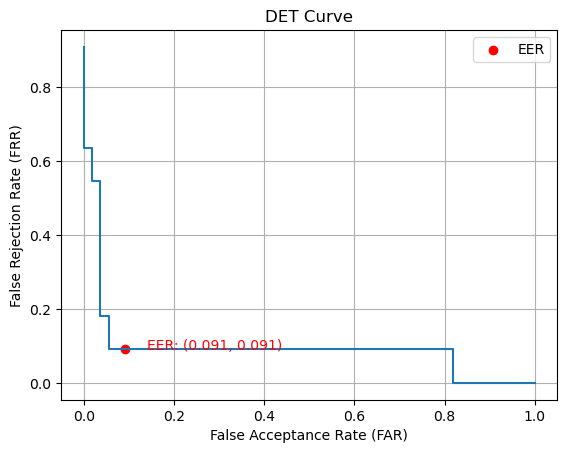

In [45]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_30_H_128:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


## d. GMM 256:
### 3 seconds segments :

## Get the scores

In [46]:
results_3_H_256 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_3_H.items():
    score = get_scores(test_segment, gmm_models_H_256)
    results_3_H_256.append((test_segment_name, score))

# Printing the results
for result in results_3_H_256:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: H1.3.1.mfcc ,Score: {'H1': -24637.332596998705, 'H2': -85.89769586680902, 'H3': -93.18464831356017, 'H4': -82.76170577131991, 'H5': -81.87963195212141, 'H6': -75.50828820992129}
File: H1.3.2.mfcc ,Score: {'H1': -38458.258943828245, 'H2': -87.57706920930737, 'H3': -97.68974834570318, 'H4': -85.24423069566107, 'H5': -80.27599907191801, 'H6': -75.4138526420616}
File: H2.3.1.mfcc ,Score: {'H1': -105340.7754421042, 'H2': -57.9399743482723, 'H3': -106.917364673459, 'H4': -79.64965370499895, 'H5': -69.31550659575711, 'H6': -83.24355947114014}
File: H2.3.10.mfcc ,Score: {'H1': -53905.36807359307, 'H2': -65.65602570904298, 'H3': -94.31161529262423, 'H4': -90.89007553929179, 'H5': -81.52689246068884, 'H6': -76.86353892336523}
File: H2.3.11.mfcc ,Score: {'H1': -78418.06792593433, 'H2': -68.63065384208647, 'H3': -102.9308628784789, 'H4': -88.85653998795502, 'H5': -78.14841743449567, 'H6': -80.44882062971944}
File: H2.3.12.mfcc ,Score: {'H1': -92122.60057368824, 'H2': -60.51447174821037, 'H3'

## Sort the scores

In [47]:
# Extract the scores from results_3_H_256
scores = [score for _, score in results_3_H_256]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


## Plot the DET curve

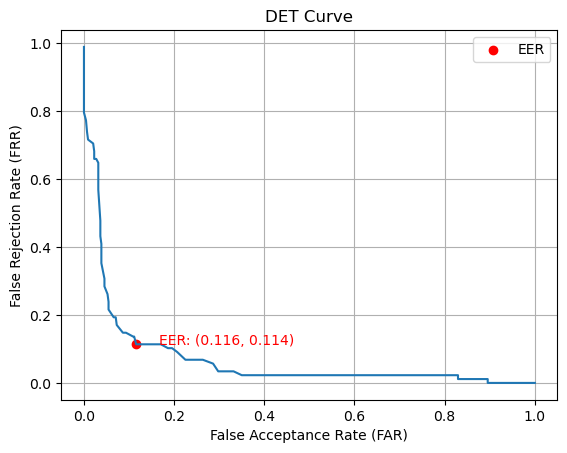

In [48]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_3_H_256:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


### 10 seconds segments :

## Get the scores

In [49]:
results_10_H_256 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_10_H.items():
    score = get_scores(test_segment, gmm_models_H_256)
    results_10_H_256.append((test_segment_name, score))

# Printing the results
for result in results_10_H_256:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: H1.10.1.mfcc ,Score: {'H1': -30115.64746686877, 'H2': -86.56336296635062, 'H3': -94.9703720687557, 'H4': -83.74572470511308, 'H5': -81.24398672596433, 'H6': -75.47085600294271}
File: H2.10.1.mfcc ,Score: {'H1': -91340.06654390525, 'H2': -63.89503861805794, 'H3': -103.39825901869774, 'H4': -84.37336219869547, 'H5': -76.46870119704481, 'H6': -82.57014453535118}
File: H2.10.2.mfcc ,Score: {'H1': -69089.29031904395, 'H2': -62.51163285227638, 'H3': -98.65562453146735, 'H4': -85.453659998065, 'H5': -78.01226012785835, 'H6': -78.19947960675475}
File: H2.10.3.mfcc ,Score: {'H1': -70536.17967031772, 'H2': -61.6311344013108, 'H3': -96.64223451454093, 'H4': -88.45542266818728, 'H5': -76.80644127974502, 'H6': -77.39223777972704}
File: H2.10.4.mfcc ,Score: {'H1': -75257.66086812291, 'H2': -64.30447624605472, 'H3': -98.66206178760477, 'H4': -84.9756086140304, 'H5': -74.3668929382402, 'H6': -78.828778678537}
File: H2.10.5.mfcc ,Score: {'H1': -82791.0046542224, 'H2': -61.460387722482615, 'H3': -

## Sort the scores

In [50]:
# Extract the scores from results_10_H_256
scores = [score for _, score in results_10_H_256]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


##  Plot the DET curve 

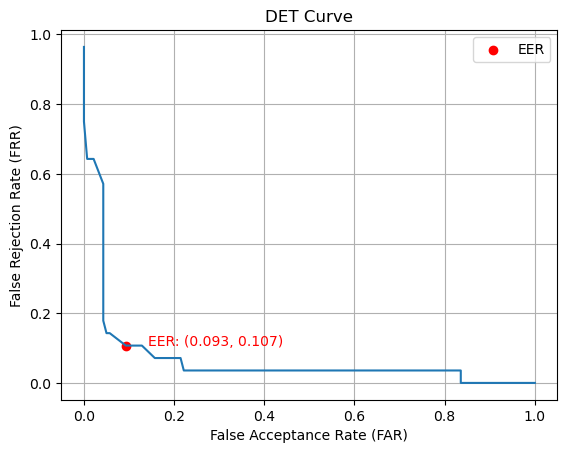

In [51]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_10_H_256:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


### 15 seconds segments :

## Get the scores

In [52]:
results_15_H_256 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_15_H.items():
    score = get_scores(test_segment, gmm_models_H_256)
    results_15_H_256.append((test_segment_name, score))

# Printing the results
for result in results_15_H_256:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: H1.15.1.mfcc ,Score: {'H1': -30115.64746686877, 'H2': -86.56336296635062, 'H3': -94.9703720687557, 'H4': -83.74572470511308, 'H5': -81.24398672596433, 'H6': -75.47085600294271}
File: H2.15.1.mfcc ,Score: {'H1': -91821.1686443301, 'H2': -62.981390116006814, 'H3': -103.99229426500686, 'H4': -84.9561638892232, 'H5': -76.90461228363012, 'H6': -82.45750057058262}
File: H2.15.2.mfcc ,Score: {'H1': -62155.85571118118, 'H2': -62.37714713175659, 'H3': -95.13845111146382, 'H4': -87.23213268740862, 'H5': -77.286989452802, 'H6': -76.3170740439727}
File: H2.15.3.mfcc ,Score: {'H1': -88371.43697705158, 'H2': -62.69903940071544, 'H3': -103.59641340415149, 'H4': -83.81805753867312, 'H5': -72.91579977522701, 'H6': -81.06940008303658}
File: H2.15.4.mfcc ,Score: {'H1': -87919.13391072403, 'H2': -61.59688653836353, 'H3': -109.0809409781495, 'H4': -89.73407341732728, 'H5': -74.05248120173852, 'H6': -80.54175757149696}
File: H3.15.1.mfcc ,Score: {'H1': -69001.93456007121, 'H2': -88.49249947004184, 'H3

## Sort the scores

In [53]:
# Extract the scores from results_15_H_256
scores = [score for _, score in results_15_H_256]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


## Plot the DET curve

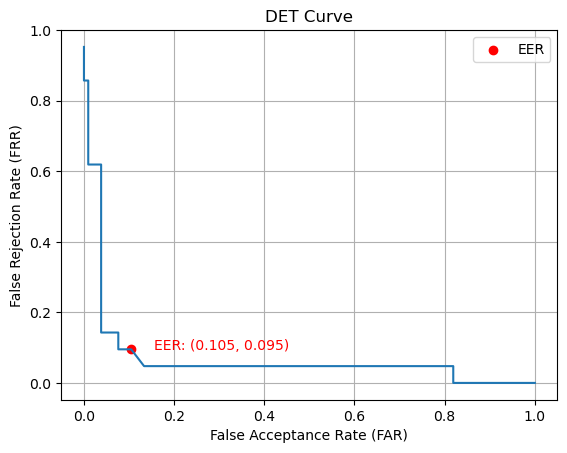

In [54]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_15_H_256:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


### 30 seconds segments :

## Get the scores

In [55]:
results_30_H_256 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_30_H.items():
    score = get_scores(test_segment, gmm_models_H_256)
    results_30_H_256.append((test_segment_name, score))

# Printing the results
for result in results_30_H_256:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: H1.30.1.mfcc ,Score: {'H1': -30115.64746686877, 'H2': -86.56336296635062, 'H3': -94.9703720687557, 'H4': -83.74572470511308, 'H5': -81.24398672596433, 'H6': -75.47085600294271}
File: H2.30.1.mfcc ,Score: {'H1': -76988.51217775563, 'H2': -62.679268623881704, 'H3': -99.56537268823534, 'H4': -86.09414828831592, 'H5': -77.09580086821607, 'H6': -79.38728730727765}
File: H2.30.2.mfcc ,Score: {'H1': -88239.15966520106, 'H2': -62.37671167682008, 'H3': -105.20037901541505, 'H4': -85.5482131258267, 'H5': -73.24822547543322, 'H6': -80.91508953720897}
File: H3.30.1.mfcc ,Score: {'H1': -69200.17977465862, 'H2': -89.06698879543302, 'H3': -72.28318981833623, 'H4': -86.3826525023257, 'H5': -90.36344233940014, 'H6': -75.90157928817547}
File: H3.30.2.mfcc ,Score: {'H1': -72553.01455894341, 'H2': -88.74977069531245, 'H3': -71.27121535351448, 'H4': -85.44997779828967, 'H5': -88.17164421791419, 'H6': -75.83508941197593}
File: H4.30.1.mfcc ,Score: {'H1': -34574.162558949414, 'H2': -90.80437160856705, 

## Sort the scores

In [56]:
# Extract the scores from results_30_H_256
scores = [score for _, score in results_30_H_256]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


## Plot  the DET curve

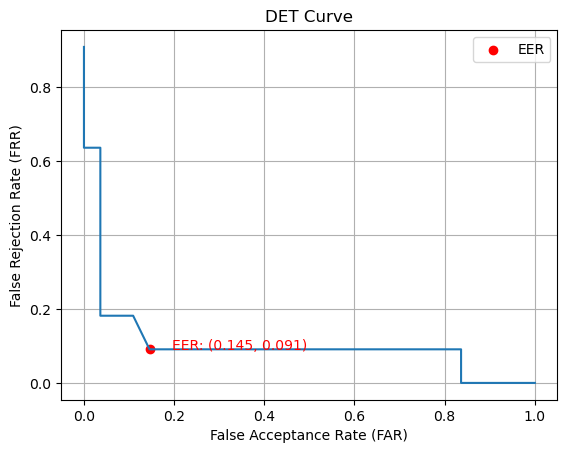

In [57]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_30_H_256:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()
